In [2]:
#Bu veriseti kişilerin belirli bağımsız değişkenlerini baz alarak kalp krizi olup olmama durumunu inceler

In [38]:
import numpy as np
import pandas as pd

In [41]:
df = pd.read_csv('heart.csv')

In [42]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [43]:
df.shape

(303, 14)

In [49]:
df["chol"].value_counts()

chol
204    6
197    6
234    6
269    5
254    5
      ..
284    1
224    1
167    1
276    1
131    1
Name: count, Length: 152, dtype: int64

In [50]:
df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

In [51]:
summary_statistics = df.describe()
print(summary_statistics)

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [52]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [53]:
df['trestbps'].fillna(df['trestbps'].mean(), inplace=True)
print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [54]:
df["oldpeak"].mean()

1.0396039603960396

In [55]:
df["slope"].max()

2

In [56]:
df['thal'].nunique()

4

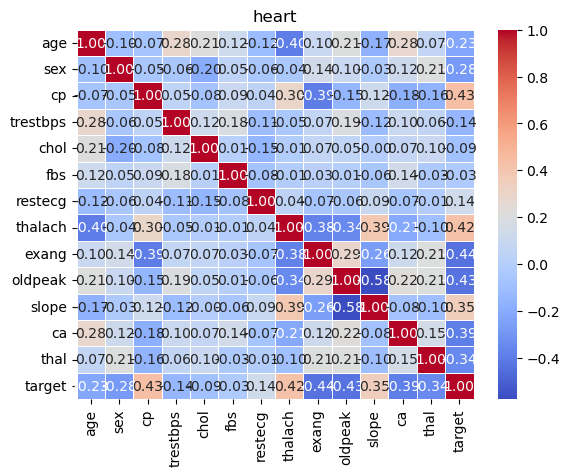

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[numeric_columns]
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("heart")
plt.show()

In [58]:
y = df["target"]
x = df.drop("target", axis=1)

In [59]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20 , random_state=42)

In [60]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

df_normalized = df.copy()
df_normalized[numerical_columns] = scaler.fit_transform(df[numerical_columns])


print(df_normalized.head())

        age  sex        cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.708333  1.0  1.000000  0.481132  0.244292  1.0      0.0  0.603053    0.0   
1  0.166667  1.0  0.666667  0.339623  0.283105  0.0      0.5  0.885496    0.0   
2  0.250000  0.0  0.333333  0.339623  0.178082  0.0      0.0  0.770992    0.0   
3  0.562500  1.0  0.333333  0.245283  0.251142  0.0      0.5  0.816794    0.0   
4  0.583333  0.0  0.000000  0.245283  0.520548  0.0      0.5  0.702290    1.0   

    oldpeak  slope   ca      thal  target  
0  0.370968    0.0  0.0  0.333333     1.0  
1  0.564516    0.0  0.0  0.666667     1.0  
2  0.225806    1.0  0.0  0.666667     1.0  
3  0.129032    1.0  0.0  0.666667     1.0  
4  0.096774    1.0  0.0  0.666667     1.0  


In [61]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_model = SVC(kernel='linear', C=1.0, random_state=42)

svm_model.fit(X_train, y_train)


y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Doğruluğu:", accuracy)


Model Doğruluğu: 0.9666666666666667


Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


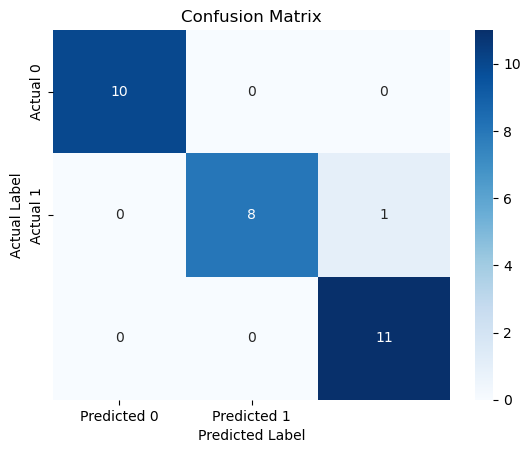

In [62]:
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


iris = datasets.load_iris()
X = iris.data
y_true = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)


y_pred = svm_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


sensitivity = recall_score(y_test, y_pred, average='macro')
print("Sensitivity (Recall):", sensitivity)


precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score:", f1)

Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Sensitivity (Recall): 1.0
Precision: 1.0
F1 Score: 1.0
